# Assignment 2a Due 9/8

In this assigment you will explore and become familiar with writing and using algorithms to numerically approxomate definite integrals.

Assignment Overview:
* Impliment your own midpoint, trapazoid, and Simpson's rule integration algorithms
* Use those to solve a definite integral
* Compare your algorithms to those from scipy
* Compare all approximate solutions to the exact solutions


You can import only the following packages: numpy, math, scipy, matplotlib.pyplot

In [119]:
#your import cell
import numpy as np 
import math 
import scipy 
import matplotlib.pyplot as plt
from scipy import integrate
%matplotlib notebook 

Now we can define our integration algorithms

In [120]:
#define midpoint rule
def midpoint(f,a,b,n):
    h=float(b-a)/n
    area=0
    for i in range (1,n):
        area+=f((a+h/2.0)+i*h)
    area*=h
    return area

In [121]:
#define trapazoidal rule
def trapeziodal(f,a,b,n):
    h=float(b-a)/(n)
    area = 0.5*f(a) + 0.5*f(b)
    for i in range(1, n):
        area += f(a + i*h)
    area *= h
    return area

In [122]:
#define simpson's rule
def simpson(f, a, b, n):
    if n % 2:
        raise ValueError("n must be even (received n=%d)" % n)
    h = (b - a) / n
    s = f(a) + f(b)   
    for i in range(1, n, 2):
        s += 4 * f(a + i * h)
    for i in range(2, n-1, 2):
        s += 2 * f(a + i * h)
    return s * h / 3

# Question 
Sanity checking your code is very important. How can you check that your functions are working properly?

In [ ]:
###basically you can make sure the expected result is the same as result from your code. 

For this notebook assigment we would like to solve the integral\
$\int_{a}^{b} \frac{2}{(2^2 + x^2)^{3/2}}dx$

# Question
Have you seen an integral like this before in physics? From where?

In [46]:
##Yes, electric field on the axis of a ring  

Solve the above integral using the numerical integrations that you wrote. When defining the function we will integrate over do so using python's **lambda** function.

For the integration take $a = 0,\; b = 2,\;$ and we will split it up into 6 partitions.

# Question
What is the exact solution?

In [123]:
#exact solution to the integral
exact_sol =0.35355

In [124]:
f1 = lambda x : 2/((2**2+x**2)**(3/2))
a = 0
b = 2
n = 6
h = ((b-a)/n)

In [125]:
#solve the integral using your integration functions
midpoint_sol = midpoint(f1,a,b,n)
print('Midpoint:',midpoint_sol)
trapeziod_sol = trapeziodal(f1,a,b,n)
print('Trapeziodal:',trapeziod_sol)
simpsons_sol = simpson(f1,a,b,n)
print('Simpson:',simpsons_sol)

Midpoint: 0.27138722305205865
Trapeziodal: 0.35293994641413146
Simpson: 0.35355179062444925


Use the trapz and simps methods from scipy's integration library to solve the integral.

Note: Shit+tab at the end of a function in jupyter notebook reveals lots of information about the function.

In [126]:
#scipy integration
xs = np.linspace(a,b,n+1) 
ys = 2/((xs**2+2**2)**(3/2))
print(xs,ys)
sci_trap = integrate.trapz(ys,xs,h)
print('sci_trap:',sci_trap)
print('exact solution:', exact_sol)
sci_simp = integrate.simps(ys,xs)
print('sci_simp:',sci_simp)
print('exact solution:', exact_sol)

[0.         0.33333333 0.66666667 1.         1.33333333 1.66666667
 2.        ] [0.25       0.23993366 0.21345374 0.17888544 0.1440087  0.11334412
 0.08838835]
sci_trap: 0.35293994641413146
exact solution: 0.35355
sci_simp: 0.35355179062444925
exact solution: 0.35355


# Question
How do scipy integrals compare to yours? Support your answer. 

In [ ]:
##The scipy integral solutions are very close in value to the ones created by me. This can be seen below 

In [127]:
trapeziod_sol==sci_trap
simpsons_sol==sci_simp

True

In [128]:
#print the numerical values
print('Trapeziodal:',trapeziod_sol)
print('sci_trap:',sci_trap)
print('Simpson:',simpsons_sol)
print('sci_simp:',sci_simp)

Trapeziodal: 0.35293994641413146
sci_trap: 0.35293994641413146
Simpson: 0.35355179062444925
sci_simp: 0.35355179062444925


Numerically compare your midpoint, trapazoid, and Simpson method results to the exact value by calculating the quantity (approx - exact) / exact for each method. 

In [129]:
#numerical comparisons
print((trapeziod_sol - exact_sol)/exact_sol)
print((simpsons_sol - exact_sol)/exact_sol)
print((midpoint_sol - exact_sol)/exact_sol)
print((sci_trap - exact_sol)/exact_sol)
print((sci_simp - exact_sol)/exact_sol)

-0.0017255086575265724
5.064699333252957e-06
-0.23239365562987224
-0.0017255086575265724
5.064699333252957e-06


# Question
Which method provides the best approximation to the exact solution?

In [ ]:
## The simpsons integration method. 

It is often useful to represent the data graphically. Make a scatter plot showing the percent difference $100 \times \frac{approx. - exact}{exact}$ vs. integration method. Integration method on your x-axis should be strings such as *midpoint, trapazoid, and Simpson*. You should also draw on your plot a line at *y = 0*, which will help guide the eye where the perfect approximation (the exact solution) would sit. 

In [130]:
trap=100*((trapeziod_sol - exact_sol)/exact_sol)
simpsons=100*((simpsons_sol - exact_sol)/exact_sol)
midpoint=100*((midpoint_sol - exact_sol)/exact_sol)

<IPython.core.display.Javascript object>


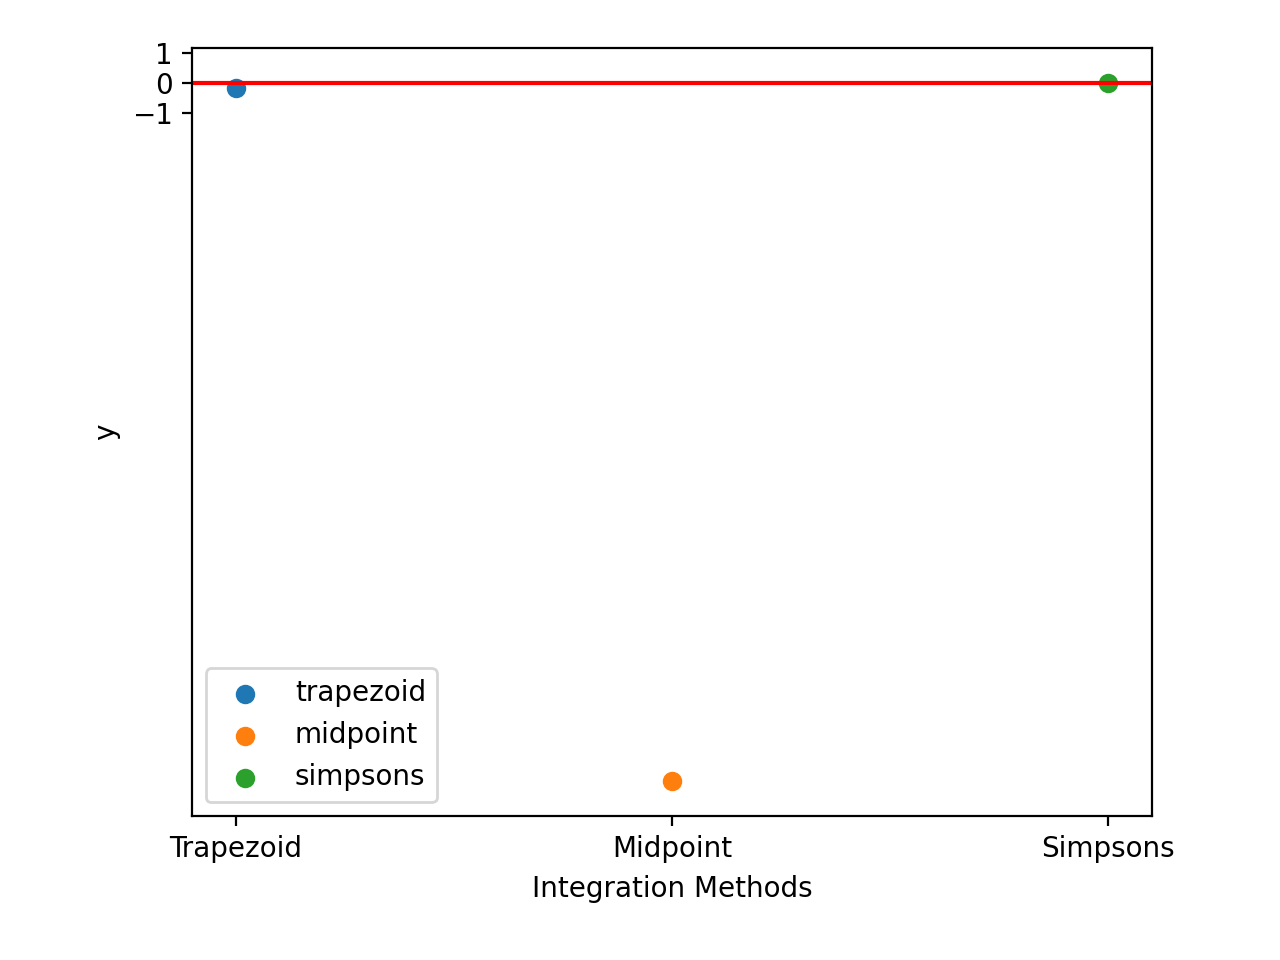

In [134]:
#plot
fig = plt.figure()
ax = fig.add_axes([0.15,0.15,0.75,0.8])
ax.set_xlabel('Integration Methods')
ax.set_xticks([1,2,3])
ax.set_xticklabels(['Trapezoid','Midpoint','Simpsons'])
ax.set_ylabel('y')
ax.set_yticks([-1,0,1])
plt.axhline(y=0.0, color='r', linestyle='-')
ax.scatter(1,trap,label='trapezoid')
ax.scatter(2,midpoint, label='midpoint')
ax.scatter(3,simpsons,label='simpsons')
ax.legend();
plt.show()


Using the scipy *quad* integration method, approximate the following integral

$$\int_{-\infty}^{\infty} e^{-x^{2}} dx$$

Hint: Reference <a href="https://numpy.org/">numpy</a> and see what it has to offer in terms of functions and *special* values

In [135]:
#solve integral above
s = lambda x: np.exp(-x**2)
print(scipy.integrate.quad(s,-np.inf,np.inf))


(1.7724538509055159, 1.4202636780944923e-08)


# Question
If you square your solution, does the resulting number have any special meaning?

In [45]:
##The real solution to this integral would be the square root of pi, so if you square it it would just be pi 